# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* `lat`: String variable, Latitude
* `lng`: String variable, Longitude
* `desc`: String variable, Description of the Emergency Call [address, town, station, date]
* `zip`: String variable, Zipcode
* `title`: String variable, Title
* `timeStamp`: String variable, `YYYY-MM-DD HH:MM:SS`
* `twp`: String variable, Township
* `addr`: String variable, Address
* `e`: String variable, Dummy variable (always 1)

____

## I. Data and Setup

### Part I. 
- **i.** Import numpy and pandas
- **ii.** Import visualization libraries and set `%matplotlib inline`
- **iii.** Read in the csv file as a dataframe called `df`
- **iv.** Check the `info()` of the df
- **v.** Check head


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## II. Basic Questions

### Part II.
**i.** What are the top 5 zipcodes for 911 calls? 

In [4]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**ii.** What are the top 5 townships (twp) for 911 calls?

In [5]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**iii.** Take a look at the `title` column, how many unique title codes are there?

In [6]:
print(f'There are {df.title.nunique()} unique titles')

There are 110 unique titles


## III. Creating new features

### Part III. 

**i.**  
In the `title` column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use `.apply()` with a custom _lambda expression_ to create a _new column called "Reason"_ that contains this string value. (i.e., if the title column value is `EMS: BACK PAINS/INJURY` , the `Reason` column value would be `EMS`.)

In [7]:
df["reason"] = df.title.apply(lambda info: info.split(':')[0])
df.reason

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

**ii.**  
What is the _most common Reason_ for a 911 call based off of this new column?

In [8]:
df.reason.value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**iii.**  
Now use _seaborn to create a **countplot** of 911 calls by Reason_. 

In [9]:
import seaborn as sns

<Axes: xlabel='reason', ylabel='count'>

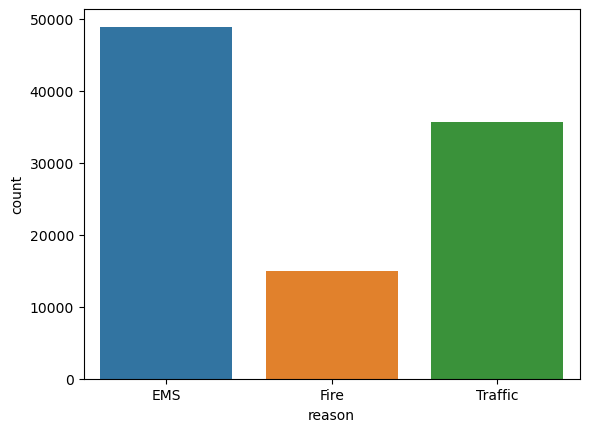

In [10]:
sns.countplot(df, x='reason')

___
### Part IV.  
Now let us begin to focus on time information. 

**i.**  
What is the data type of the objects in the timeStamp column?

In [11]:
type(df.timeStamp[0])

# OR
# type(df['timeStamp'].iloc[0])

str

**ii.**  
You should have seen that these timestamps are still strings. Use the pandas [`.to_datetime()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) method to convert the column from strings to DateTime objects.

In [12]:
# type(df.timeStamp.apply(lambda stamp: pd.to_datetime(stamp))[0])

df.timeStamp = pd.to_datetime(df.timeStamp)
type(df.timeStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

**iii.**  
You can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

Now that the timestamp column are actually DateTime objects, use `.apply()` to _create 3 new columns called Hour, Month, and Day of Week_. You will create these columns based off of the timeStamp column

In [13]:
df["hour"] = df.timeStamp.apply(lambda stamp: stamp.hour)
df["month"] = df.timeStamp.apply(lambda stamp: stamp.month)
df["day of week"] = df.timeStamp.apply(lambda stamp: stamp.dayofweek)

**iv.**  
Notice how the Day of Week is an integer 0-6. Use the `.map()` with this dictionary to map the actual string names to the day of the week: 

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df["day of week"] = df["day of week"].map(dmap)

**v.**  
Now use seaborn to _create a **countplot** of the Day of Week column_ with the hue based off of the Reason column.

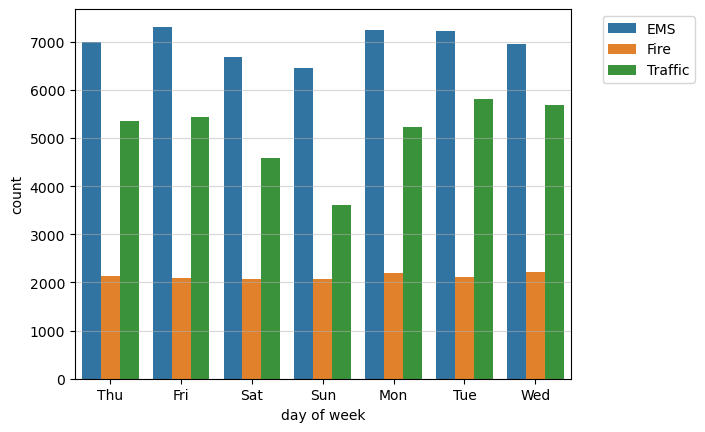

In [15]:
sns.countplot(data=df, x='day of week', hue='reason')
plt.grid(axis='y', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

**vi.**  
Now do the same for Month

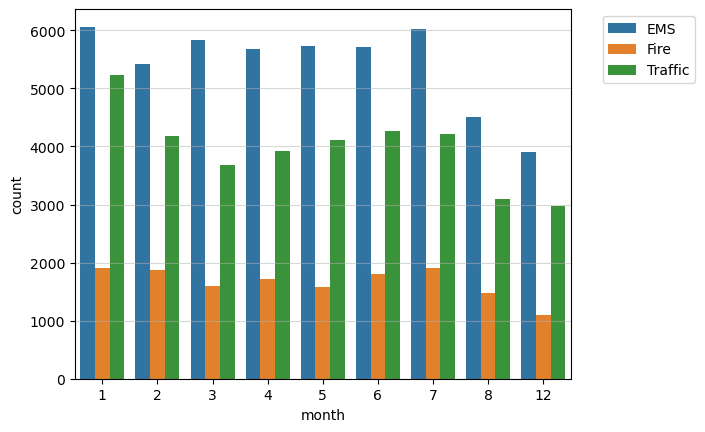

In [16]:
sns.countplot(data=df, x='month', hue='reason')
plt.grid(axis='y', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

**vii.**

You may have noticed there is some missing Months. Let's fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months...

Create a gropuby object called byMonth, where you group the DataFrame by the month column and use the `count()` method for aggregation.

In [17]:
month_cnt_df = df.groupby('month').count()
month_cnt_df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**viii.**  
Create a _simple plot off of the dataframe indicating the count of calls per month_. 

<Axes: xlabel='month'>

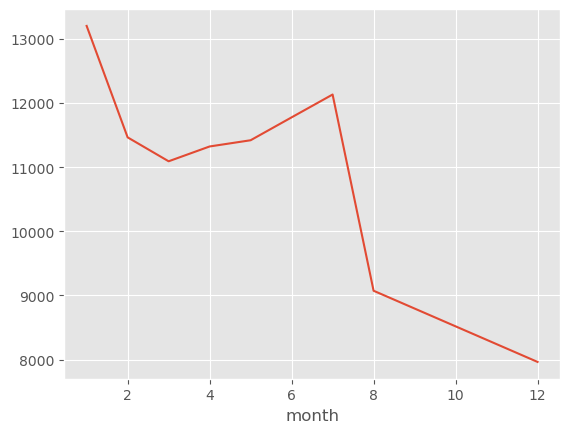

In [18]:
plt.style.use('ggplot')
month_cnt_df.twp.plot()

**ix.**  
Use seaborn's `lmplot()` to create a _linear fit on the number of calls per month_ (NOTE: may need to reset the index to a column).

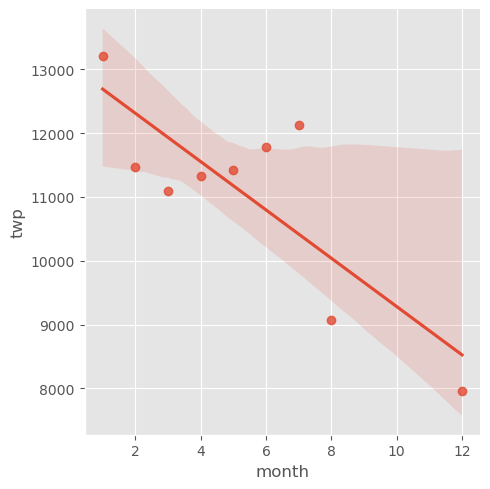

In [19]:
sns.lmplot(data=month_cnt_df.reset_index(), x='month', y='twp')

**x.**  
- Create a new column called 'Date' that contains the date from the timeStamp column.
- Groupby this `Date` column with the `count()` aggregate
- Create a plot of counts of 911 calls.

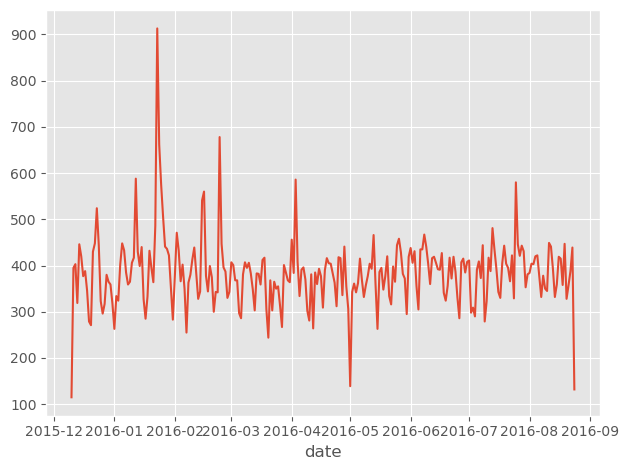

In [20]:
df['date'] = df.timeStamp.apply(lambda stamp: stamp.date())

df.groupby('date').count()['twp'].plot()
plt.tight_layout()

**xi.**  
Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

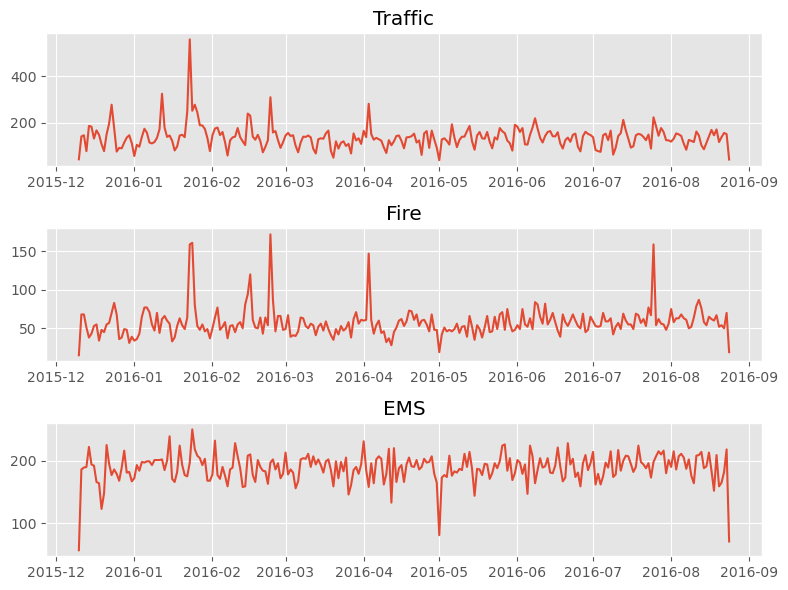

In [41]:
fig, axes = plt.subplots(3, 1, figsize=(8,6))

# Traffic
axes[0].plot(df[df['reason'] == 'Traffic'].groupby('date').count()['twp'])
axes[0].set_title("Traffic")

# Fire
axes[1].plot(df[df['reason'] == 'Fire'].groupby('date').count()['twp'])
axes[1].set_title("Fire");

# EMS
axes[2].plot(df[df['reason'] == 'EMS'].groupby('date').count()['twp'])
axes[2].set_title("EMS");

# df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()

plt.tight_layout()

____
### Part V.
**Heatmaps** with seaborn. 

**i.**  
Restructure the dataframe so that the _columns become the Hours and the Index becomes the Day of the Week_.  
(NOTE: There are lots of ways to do this, but combining groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method is recommended). 

In [57]:
day_hour_df = df.groupby(by=['day of week', 'hour']).count()['reason'].unstack()
day_hour_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**ii.**  
Now create a _HeatMap_ using this new DataFrame.

_Observations:_ 
- Most of the 911 calls happen between $7$am and $8$pm, this makes sense these are the busiest and most active parts of the day.  
- But I find interesting the spike in 911 calls late Friday night into early Saturaday moring and late Saturday night into early Sunday morning. This is the time of the week when people are out and about doing weekend night activities. With those activities come emergancy calls.  
- Another interestisng observation is taht Sunday seems to be the day w/ the least 911 calls. 

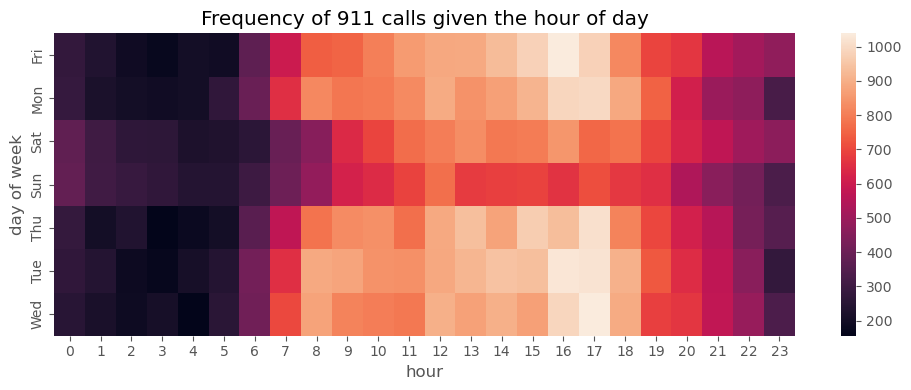

In [64]:
plt.figure(figsize=(10, 4))
sns.heatmap(day_hour_df)
plt.title("Frequency of 911 calls given the hour of day")
plt.tight_layout()

**iii.**  
Now create a _clustermap_ using this DataFrame. 

<Figure size 600x300 with 0 Axes>

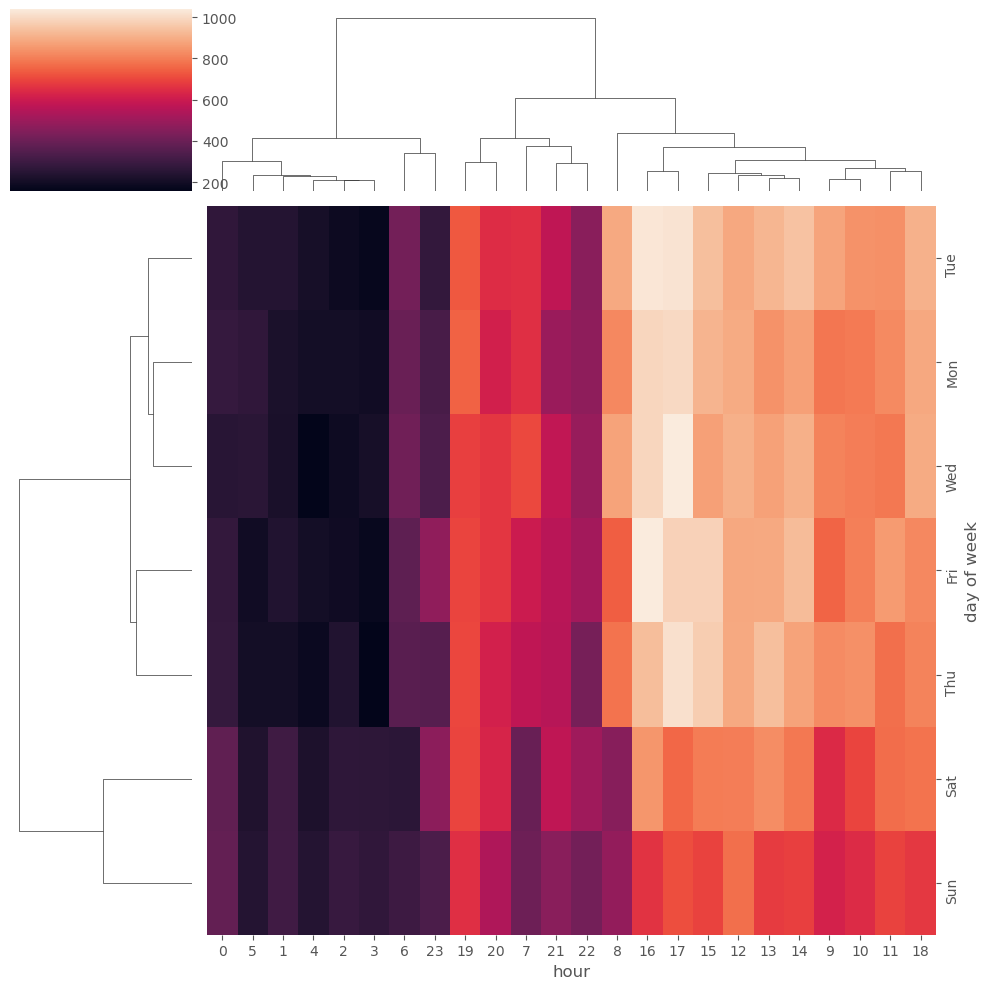

In [70]:
plt.figure(figsize=(6, 3))
sns.clustermap(day_hour_df)
plt.tight_layout()

**iv.**  
Create a similar DataFrame that shows the Month as the column.

In [76]:
day_of_month_df = df.groupby(by=['day of week', 'month']).count()['twp'].unstack()
day_of_month_df

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


**v.**  
Plot that new df as a heatmap

<Axes: xlabel='month', ylabel='day of week'>

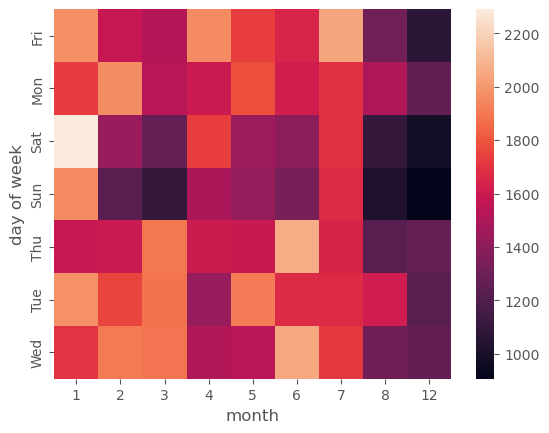

In [77]:
sns.heatmap(day_of_month_df)

**vi.**  
Plot a _clustermap_ with new df

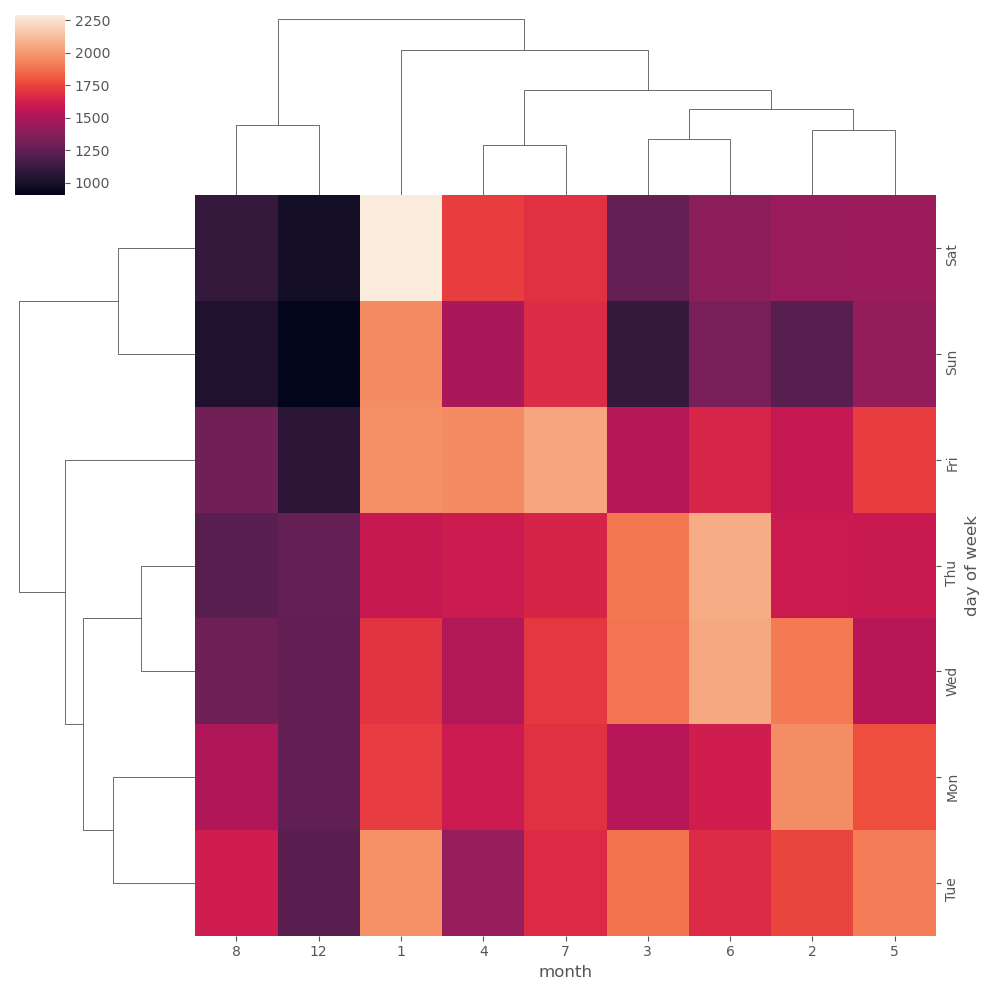

In [78]:
sns.clustermap(day_of_month_df)